# Recurrent Neural Network

### Part 1 - Data Preprocessing

#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing the training set

In [4]:
dataset_train = pd.read_csv('C:/Users/leandro/Desktop/dl/Volume 1 - Supervised Deep Learning/Part 3 - Recurrent Neural Networks (RNN)/Section 12 - Building a RNN/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [8]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

#### Feature Scaling

Normalisation, recommended for RNN

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

#### Creating a data structure with 60 timesteps and 1 output

In [13]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#### Reshaping

3D Tensor shape for RNN ( Batch size = Total number of observations,time steps = 60 , Indicators = predictors)

In [19]:
X_train.shape[0]

1198

In [20]:
X_train.shape[1]

60

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [22]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

### Part 2 - Building the RNN

#### Importing the Keras libraries and packages

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


#### Initialising the RNN

In [24]:
regressor = Sequential()

#### Adding the first LSTM layer and some Dropout regularisation

Drop regularisation to avoid overfitting

Units= number of cells, Return_Sequences= True(when you creating other layer)
input_shape =  3D shape created before, only add the last two since the first argument is taken by default

Number of cell= large number of neurons, high dimensionality

Dropout reg = rate(Improving/Tuning) ignore neurons - Drop 20% (0.2)- for propagation and backpropagation - during each iteration of the training

In [25]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#### Adding a second LSTM layer and some Dropout regularisation

In [26]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding a third LSTM layer and some Dropout regularisation

In [27]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding a fourth LSTM layer and some Dropout regularisation

In [28]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#### Adding the output layer

Argument = 1 a real Value, only 1 dimension, t+1

In [29]:
regressor.add(Dense(units = 1))

#### Compiling the RNN

Optimizer = Adam : recommended(relevant weight)) 

In [30]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### Fitting the RNN to the Training set

In [33]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0045
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0050
Epoch 4/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044A: 
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0033
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step -

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0013
Epoch 100/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0013


### Part 3 - Making the predictions and visualising the results

#### Getting the real stock price of 2017

In [34]:
dataset_test = pd.read_csv('C:/Users/leandro/Desktop/dl/Volume 1 - Supervised Deep Learning/Part 3 - Recurrent Neural Networks (RNN)/Section 12 - Building a RNN/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [35]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


#### Getting the predicted stock price of 2017

In [36]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#### Using regressor to predict Stock price , Note: apply inverse tranform the scaling 

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#### Visualising the results

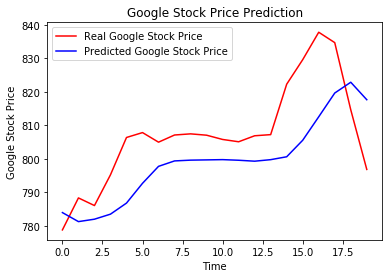

In [37]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### Prediting RMSE

In [41]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [42]:
rmse

13.533735212252804

### Improving the RNN - Tips

1) Getting more training data
2) Increasing the number of timesteps
3) Adding some other indicators:
4) Adding more LSTM layers
5) Adding more neurones in the LSTM layers

### Evaluating , Improving and Tuning the RNN


In [43]:
from keras.wrappers.scikit_learn import KerasClassifier

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [47]:
classifier = KerasClassifier(build_fn = build_classifier)

In [48]:
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}

In [49]:
grid_search = GridSearchCV(estimator = classifier,param_grid = parameters,scoring = 'neg_mean_squared_error',cv = 10)

In [51]:
#grid_search = grid_search.fit(X_train, y_train)

In [ ]:
best_parameters = grid_search.best_params_

In [ ]:
best_accuracy = grid_search.best_score_